In [1]:
#import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn . svm import SVC
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from IPython.display import display
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline 

## Введение (Introduction)  
Данный блокнот является дополнительным материалом к демонстрации примеров классификации спектров излучения источников искусственного и естественного света представленной публикации на портале Habrahabr – https://habrahabr.ru/post/338124/     
    
Внимание! Изложенные ниже методы и данные (ies) на основании, которых проводится классификация, собраны на основании материалов, размещенных пользователями в общем доступе на портале https://www.ltcompany.com/ru/knowledge/libraries/ 
Учитывая возможные ошибки вызванные техническими и «человеческими» факторами при обработке данных, рекомендуется применение данного набора исключительно в демонстрационных целях.   
  
Materials may contain errors, not recommended for serious research.  
ies source from: https://www.ltcompany.com/ru/knowledge/libraries/  
P.S. English text from google translate :)

# Описание данных (Data description)  
    
Набор данных состоит из тестовой и обучающей выборки, описывающей кривые силы света светильников (КСС).  
КСС разбиты на 19 признаков где значение признака соответствует силе света  светильника в направлении соответствующего полярного угла. Все данные взяты относительно азимутального угла -  0 градусов. 
Значение признака – условная мощность излучения.   
Поле label содержит метку источника света:  
Типы КСС взяты в соответствии с ГОСТ Р 54350-2011
1-	Компактная КСС (Тип К);
  2-	Глубокая КСС (Тип Г);
  3-	Косинусная (Тип Д);
  4-	Полу широкая (Тип Л);
  train.csv – обучающая выборка;
  train.csv – обучающая выборка;
  Также в таблице в столбце files находятся наименования светильников, если вы захотите сами проверить корректность распределения силы света (https://www.ltcompany.com/ru/products/types/indoor-luminaires/).

The data set consists of a test and training sample describing the luminous intensity curves (KSS).
KCC divided into 19 features where the value of the characteristic corresponds to the light intensity of the lamp in the direction of the corresponding polar angle. All data are taken for the azimuth angle of 0 degrees.
Significance value - light power.
The label field contains the light source label:
Types of LIDC are taken in accordance with GOST R 54350-2011
1- Compact LIDC;
2- Deep LIDC;
3- Cosine LIDC;
4- Semi-wide LIDC;
train.csv - training sample;
train.csv - training sample;
Also in the table in the files column are the names of the luminaires, if you want to check the correctness of the distribution of light intensity yourself. (https://www.ltcompany.com/ru/products/types/indoor-luminaires/)



In [2]:
#reading data
train_df=pd.read_csv('lidc_data\\train.csv',sep='\t',index_col=None)
test_df=pd.read_csv('lidc_data\\test.csv',sep='\t',index_col=None)
print('train shape {0}, test shape {1}]'. format(train_df.shape, test_df.shape))
display('train:',train_df.head(4),'test:',test_df.head(4))

#divide the data and labels
X_train=np.array(train_df.iloc[:,1:-1])
X_test=np.array(test_df.iloc[:,1:-1])
y_train=np.array(train_df['label'])
y_test=np.array(test_df['label'])

train shape (145, 21), test shape (48, 21)]


'train:'

,file,0,10,20,30,40,50,60,70,80,...,100,110,120,130,140,150,160,170,180,label
0,AQUA_18_LED_6000K.ies,5504.5,1785.5,269.3,102.6,52.6,32.8,18.5,8.9,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,ATLAS_LED_10.ies,3691.1,2304.0,809.2,221.0,62.3,23.5,9.3,3.6,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,ATLAS_LED_30.ies,357.5,2635.1,1746.7,1275.7,654.4,294.6,151.0,81.9,34.8,...,0.5,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,1
3,Barro_10_(40deg).ies,1185.9,878.8,522.9,279.4,130.5,25.4,17.0,11.0,1.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


'test:'

,file,0,10,20,30,40,50,60,70,80,...,100,110,120,130,140,150,160,170,180,label
0,ATLAS_LED_20.ies,357.5,1878.3,1245.0,909.3,466.4,210.0,107.6,58.4,24.8,...,0.4,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,1
1,Barro_15_(32deg).ies,1919.2,1582.5,691.0,404.1,165.8,35.2,22.7,15.1,4.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,DL_POWER_LED_60_D40_4000K.ies,357.5,6313.0,4373.1,2661.4,1579.3,789.6,242.5,73.1,4.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,DL_TURN_LED_28_W_D20_4000K.ies,357.5,7176.9,1828.4,943.2,104.4,4.3,2.7,1.5,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Исследование и обработка данных (Research and data processing).

Данные достаточно сбалансированы, только Тип КСС Л, представлен чуть в меньшем объеме.
Несмотря на то, что все признаки представляют собой один тип параметра, посмотрим нужно ли их масштабировать.
В данном случае масштабирование будет проводится не по признакам, а по образцам (строкам).
Посмотрим можно ли легко различить двухмерное представление данных.
Увидим, что в случае с масштабированием – намного проще чем без него.

The data are balanced, only the Type LIDC Semi-wide is presented in a slightly smaller volume.
Despite the fact that all the characteristics are a single type of parameter, let's see if they need to be scaled.
In this case, the scaling will be carried out not by features but by samples (rows).
Let's see if it's easy to distinguish between two-dimensional data representation.
We will see that in the case of scaling, it is much easier than without it.


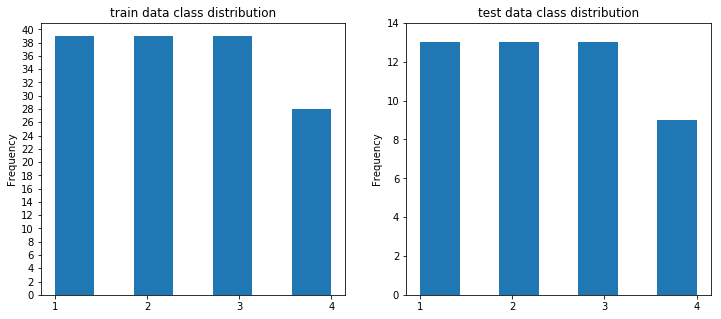

In [3]:
#draw classdistributions

test_n_max=test_df.label.value_counts().max()
train_n_max=train_df.label.value_counts().max()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
train_df.label.plot.hist(ax=axes[0],title='train data class distribution', bins=7,yticks=np.arange(0,train_n_max+2,2), xticks=np.unique(train_df.label.values))
test_df.label.plot.hist(ax=axes[1],title='test data class distribution',bins=7, yticks=np.arange(0,test_n_max+2,2), xticks=np.unique(test_df.label.values))


In [4]:
#scaled all data for final prediction
scl=MinMaxScaler()
X_train_scl=scl.fit_transform(X_train.T).T
X_test_scl=scl.fit_transform(X_test.T).T
pd.DataFrame(X_train_scl.T).head(5)

#scaled part of data for test
X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=42)

scl=MinMaxScaler()
X_train_part_scl=scl.fit_transform(X_train_part.T).T
X_test_part_scl=scl.fit_transform(X_test_part.T).T
#pd.DataFrame(X_train_scl.T).head(5)

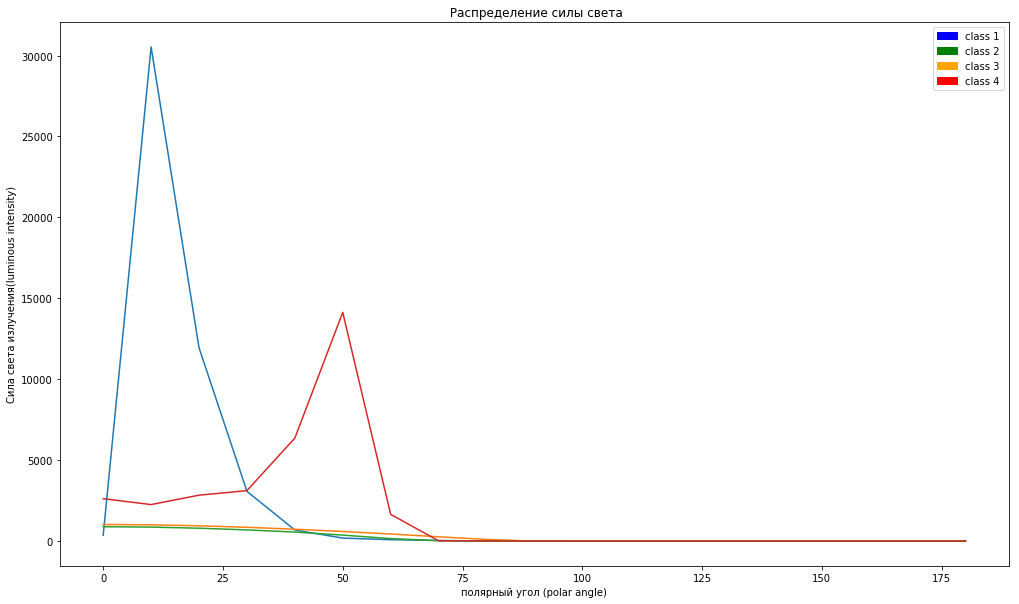

In [5]:
#not scaled
x=np.arange(0,190,10)
plt.figure(figsize=(17,10))
plt.plot(x,X_train[13])
plt.plot(x,X_train[109])
plt.plot(x,X_train[68])
plt.plot(x,X_train[127])

c1 = mpatches.Patch( color='blue', label='class 1')
c2 = mpatches.Patch( color='green', label='class 2')
c3 = mpatches.Patch(color='orange', label='class 3')
c4 = mpatches.Patch( color='red',label='class 4')
#red_patch2 = mpatches.Patch(color='orange', linestyle='--', label='RGB прив.')

plt.legend(handles=[c1,c2,c3,c4])

plt.xlabel('полярный угол (polar angle)')
plt.ylabel('Сила света излучения(luminous intensity)')
plt.title(' Распределение силы света')

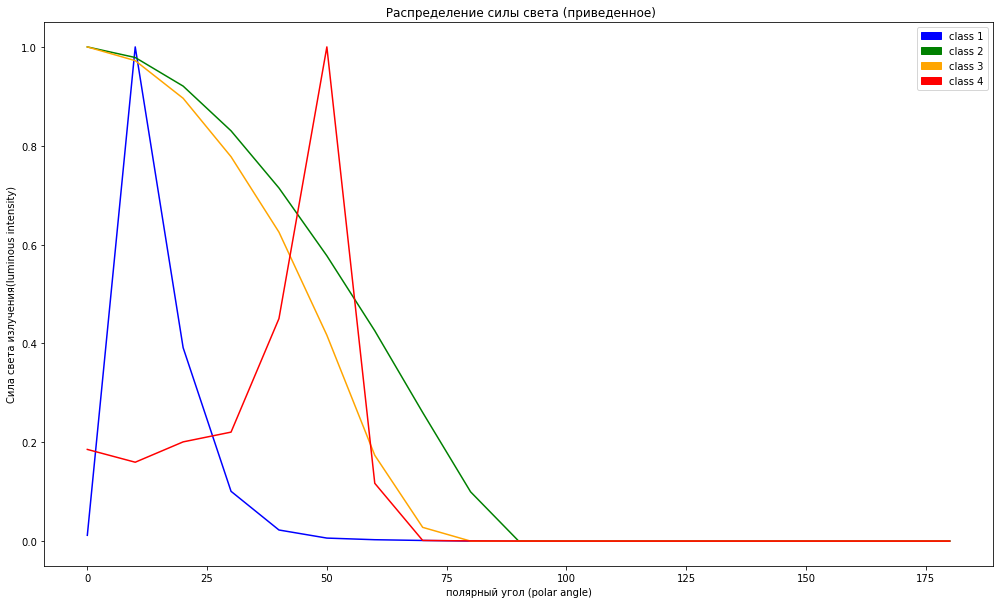

In [6]:
#scaled
x=np.arange(0,190,10)
plt.figure(figsize=(17,10))
plt.legend()
plt.plot(x,X_train_scl[13],color='blue')
plt.plot(x,X_train_scl[109],color='green')
plt.plot(x,X_train_scl[68], color='orange')
plt.plot(x,X_train_scl[127], color='red')

c1 = mpatches.Patch( color='blue', label='class 1')
c2 = mpatches.Patch( color='green', label='class 2')
c3 = mpatches.Patch(color='orange', label='class 3')
c4 = mpatches.Patch( color='red',label='class 4')
#red_patch2 = mpatches.Patch(color='orange', linestyle='--', label='RGB прив.')

plt.legend(handles=[c1,c2,c3,c4])

plt.xlabel('полярный угол (polar angle)')
plt.ylabel('Сила света излучения(luminous intensity)')
plt.title(' Распределение силы света (приведенное)')

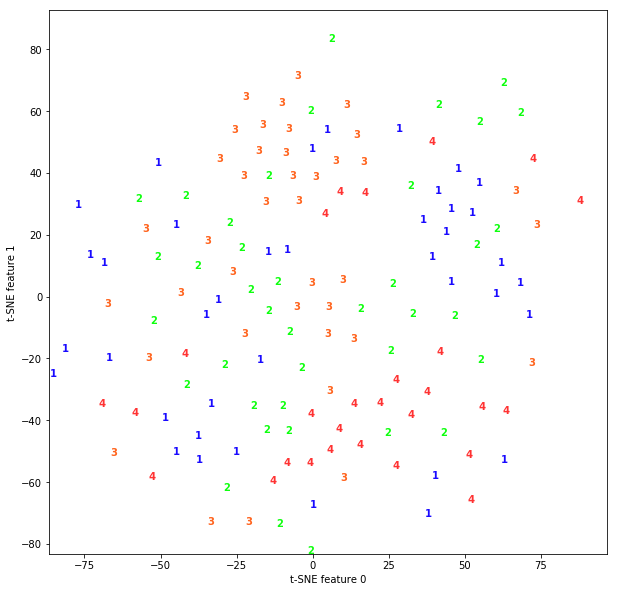

In [7]:
#T-SNE
colors = ["#190aff", "#0fff0f",  "#ff641e" , "#ff3232"]
tsne = TSNE(random_state=42)
d_tsne = tsne.fit_transform(X_train)
plt.figure(figsize=(10, 10))
plt.xlim(d_tsne[:, 0].min(), d_tsne[:, 0].max() + 10)
plt.ylim(d_tsne[:, 1].min(), d_tsne[:, 1].max() + 10)
for i in range(len(X_train)):
    # строим график, где цифры представлены символами вместо точек
    plt.text(d_tsne[i, 0], d_tsne[i, 1], str(y_train[i]),
    color = colors[y_train[i]-1],
    fontdict={'weight': 'bold', 'size': 10})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

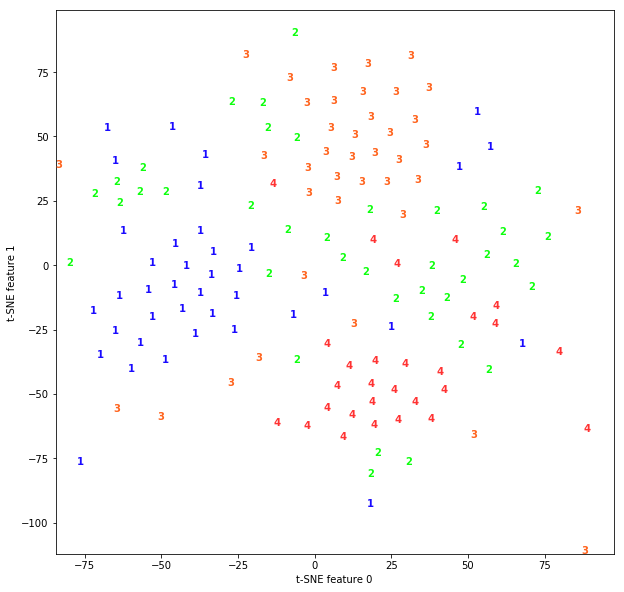

In [8]:
#T-SNE
d_tsne = tsne.fit_transform(X_train_scl)
plt.figure(figsize=(10, 10))
plt.xlim(d_tsne[:, 0].min(), d_tsne[:, 0].max() + 10)
plt.ylim(d_tsne[:, 1].min(), d_tsne[:, 1].max() + 10)
for i in range(len(X_train_scl)):
    # строим график, где цифры представлены символами вместо точек
    plt.text(d_tsne[i, 0], d_tsne[i, 1], str(y_train[i]),
    color = colors[y_train[i]-1],
    fontdict={'weight': 'bold', 'size': 10})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

## C-Support Vector Classification

На прошлом шаге мы дополнительно разделили учебную выборку для проведения контроля. Настоящую тестовую (набор данных из файла test.csv) выборку оставим для итоговой валидации.
Проверим как влияет масштабирование данных и увидим, что влияние - положительное.
Добившись идеальных показателей на базе контроля по меньшей выборке, обучим модель н полных данных и проверим по набору для валидации.

At the previous step, we further divided the training sample for monitoring. The present test (the data set from the file test.csv) is left to the sample for the final validation.
Let's check how the scale of the data affects and see that the effect is positive.
Having achieved ideal indicators on the basis of control over a smaller sample, we will train the model for complete data and check on the validation set.


In [9]:
#predict part of full data (test labels the part of X_train)
#not scaled
svm = SVC(kernel= 'rbf', random_state=42 , gamma=2, C=1.1)
svm.fit (X_train_part, y_train_part)
pred=svm.predict(X_test_part)
print("\n not scaled: \n results (pred, real): \n",list(zip(pred,y_test_part)))
print('not scaled: accuracy = {}, f1-score= {}'.format( accuracy_score(y_test_part,pred), f1_score(y_test_part,pred, average='macro')))
#scaled
svm = SVC(kernel= 'rbf', random_state=42 , gamma=2, C=1.1)
svm.fit (X_train_part_scl, y_train_part)
pred=svm.predict(X_test_part_scl)
print("\n scaled: \n results (pred, real): \n",list(zip(pred,y_test_part)))
print('scaled: accuracy = {}, f1-score= {}'.format( accuracy_score(y_test_part,pred), f1_score(y_test_part,pred, average='macro')))


 not scaled: 
 results (pred, real): 
 [(2, 3), (2, 3), (2, 2), (3, 3), (2, 1), (2, 3), (2, 3), (2, 2), (2, 1), (2, 2), (1, 1), (3, 3), (2, 2), (2, 1), (2, 4), (3, 3), (2, 2), (2, 4), (2, 1), (2, 2), (4, 4), (2, 2), (4, 4), (2, 4), (2, 3), (2, 1), (2, 1), (2, 1), (2, 2)]
not scaled: accuracy = 0.4827586206896552, f1-score= 0.46380859284085096

 scaled: 
 results (pred, real): 
 [(3, 3), (3, 3), (2, 2), (3, 3), (1, 1), (3, 3), (3, 3), (2, 2), (1, 1), (2, 2), (1, 1), (3, 3), (2, 2), (1, 1), (4, 4), (3, 3), (2, 2), (4, 4), (1, 1), (2, 2), (4, 4), (2, 2), (4, 4), (4, 4), (3, 3), (1, 1), (1, 1), (1, 1), (2, 2)]
scaled: accuracy = 1.0, f1-score= 1.0


In [10]:
#final predict full data
svm.fit (X_train_scl, y_train)
pred=svm.predict(X_test_scl)
print("\n results (pred, real): \n",list(zip(pred,y_test)))
print('scaled: accuracy = {}, f1-score= {}'.format( accuracy_score(y_test,pred), f1_score(y_test,pred, average='macro')))


 results (pred, real): 
 [(1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4)]
scaled: accuracy = 1.0, f1-score= 1.0


## Random Forest Classifier

Проверим два иногда встречаемых заблуждения:
1.	Random Forest всегда предсказывает лучше чем методы не на основа ансамблей.
2.	Для Random Forest всегда нет необходимости масштабировать признаки.
Важно отметить, что в данном случае не использовался автоматический подбор параметров, полученные результаты основываются на ручном переборе параметров, как для модели  SCV так и для Random Forest.
Как видно в данном случае Random Forest немного уступает SVC, также видно, что масштабирование признаков бывает полезно и для Random Forest.

Let's check two sometimes encountered fallacies:
1. Random Forest always predicts better than methods not based on ensembles.
2. For Random Forest, there is always no need to scale features.  
  
It is important to note that in this case the automatic selection of parameters was not used, the results obtained are based on manual parameter scanning, both for the SCV model and for Random Forest.
As you can see in this case, Random Forest is slightly inferior to SVC, it also shows that scaling of attributes is also useful for Random Forest.


In [11]:
rfc=RandomForestClassifier(random_state=42,n_jobs=-1, n_estimators=100)

rfc=rfc.fit(X_train, y_train)
rpred=rfc.predict(X_test)
print("\n not scaled: \n results (pred, real): \n",list(zip(rpred,y_test)))
print('not scaled: accuracy = {}, f1-score= {}'.format( accuracy_score(y_test,rpred), f1_score(y_test,rpred, average='macro')))


rfc=rfc.fit(X_train_scl, y_train)
rpred=rfc.predict(X_test_scl)
print("\n scaled: \n results (pred, real): \n",list(zip(rpred,y_test)))
print('scaled: accuracy = {}, f1-score= {}'.format( accuracy_score(y_test,rpred), f1_score(y_test,rpred, average='macro')))


 not scaled: 
 results (pred, real): 
 [(1, 1), (1, 1), (2, 1), (1, 1), (1, 1), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2), (2, 2), (2, 2), (1, 2), (2, 2), (2, 2), (2, 2), (2, 2), (3, 2), (2, 2), (3, 2), (2, 2), (4, 2), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (4, 3), (3, 3), (3, 3), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4)]
not scaled: accuracy = 0.8541666666666666, f1-score= 0.8547222222222222

 scaled: 
 results (pred, real): 
 [(1, 1), (1, 1), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4)]
scaled: accuracy = 0.9791666666666666, f1-score= 0.9807407407407408
